[View in Colaboratory](https://colab.research.google.com/github/katoy/book-mlearn-gyomu/blob/master/AI%E3%83%BB%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%83%BB%E6%B7%B1%E5%B1%A4%E5%AD%A6%E7%BF%92.ipynb)

# 準備

https://github.com/kujirahand/book-mlearn-gyomu
 
http://www.socym.co.jp/book/1164
  

In [27]:
# 追加でインストールする
!pip install pandas_profiling
!pip install mlxtend
!apt-get -y install fonts-ipafont-gothic
!pip install -q untangle
!pip install -q wordcloud

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-ipafont-gothic is already the newest version (00303-17ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.


# ２章

## And の学習

In [0]:
# ライブラリのインポート --- (*1)
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# 学習用のデータと結果の準備 --- (*2)
# X , Y
learn_data = [[0,0], [1,0], [0,1], [1,1]]
# X and Y
learn_label = [0, 0, 0, 1]

# アルゴリズムの指定(LinierSVC) --- (*3)
clf = LinearSVC()

# 学習用データと結果の学習  --- (*4)
clf.fit(learn_data, learn_label)

# テストデータによる予測 --- (*5)
test_data = [[0,0], [1,0], [0,1], [1,1]]
test_label = clf.predict(test_data)

# 予測結果の評価 --- (*6)
print(test_data , "の予測結果：" ,  test_label)
print("正解率 = " , accuracy_score([0, 0, 0, 1], test_label))

[[0, 0], [1, 0], [0, 1], [1, 1]] の予測結果： [0 0 0 1]
正解率 =  1.0


## ORの学習

In [0]:
# ライブラリのインポート
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# 学習用のデータと結果の準備
# X , Y
learn_data = [[0,0], [1,0], [0,1], [1,1]]
# X xor Y
learn_label = [0, 1, 1, 0]  #(*) xor用のラベルに変更

# アルゴリズムの指定(LinierSVC)
clf = LinearSVC()

# 学習用データと結果の学習 
clf.fit(learn_data, learn_label)

# テストデータによる予測
test_data = [[0,0], [1,0], [0,1], [1,1]]
test_label = clf.predict(test_data)

# テスト結果の評価
print(test_data , "の予測結果：" ,  test_label)
print("正解率 = " , accuracy_score([0, 1, 1, 0], test_label))  #(*) xor用のラベルに変更

[[0, 0], [1, 0], [0, 1], [1, 1]] の予測結果： [1 1 1 1]
正解率 =  0.5


In [0]:
# ライブラリのインポート --- (*1)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 学習用のデータと結果の準備
# X , Y
learn_data = [[0,0], [1,0], [0,1], [1,1]]
# X xor Y
learn_label = [0, 1, 1, 0]  #(*) xor用のラベルに変更

# アルゴリズムの指定(KNeighborsClassifier) --- (*2)    # <----　変更
clf = KNeighborsClassifier(n_neighbors = 1)

# 学習用データと結果の学習 
clf.fit(learn_data, learn_label)

# テストデータによる予測
test_data = [[0,0], [1,0], [0,1], [1,1]]
test_label = clf.predict(test_data)

# テスト結果の評価
print(test_data , "の予測結果：" ,  test_label)
print("正解率 = " , accuracy_score([0, 1, 1, 0], test_label))  #(*) xor用のラベルに変更

[[0, 0], [1, 0], [0, 1], [1, 1]] の予測結果： [0 1 1 0]
正解率 =  1.0


## アヤメの分類

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# csvファイルを読む場合 
#  https://github.com/kujirahand/book-mlearn-gyomu/blob/master/ch2/iris/iris.csv
# -------------------------------------------
# アヤメデータの読み込み --- (*1)
# iris_data = pd.read_csv("iris.csv", encoding="utf-8")
#
# アヤメデータをラベルと入力データに分離する --- (*2)
# y = iris_data.loc[:,"Name"]
# x = iris_data.loc[:,["SepalLength","SepalWidth","PetalLength","PetalWidth"]]
# 
# 学習用とテスト用に分離する --- (*3)
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, train_size = 0.8, shuffle = True)

# sklearn の datases を利用する場合
#-----------------------------------------
from sklearn.datasets import load_iris

iris= load_iris()
x = pd.DataFrame(data=iris.data, columns=iris.feature_names)
y = pd.Series(data=iris.target)
# print("データの先頭 5 行")
# print(ｘ.head())
# print("")
# print("ラベルの種類")
# print(y.unique())
# print("")

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.2, train_size = 0.8, shuffle = True)
print("学習数:", len(x_train),  " テスト数:", len(x_test))

# 学習する --- (*4)
clf = SVC()
clf.fit(x_train, y_train)

# 評価する --- (*5)
y_pred = clf.predict(x_test)
print("正解率 = " , accuracy_score(y_test, y_pred))

学習数: 120  テスト数: 30
正解率 =  0.9666666666666667


### csv ファイルのダウンロード

In [0]:
import urllib.request as req
import pandas as pd

# ファイルをダウンロード
url = "https://raw.githubusercontent.com/pandas-dev/pandas/master/pandas/tests/data/iris.csv"
savefile = "iris.csv"
req.urlretrieve(url, savefile)
print("保存しました。" , savefile)

# ダウンロードしたファイルの内容を表示
csv = pd.read_csv(savefile, encoding="utf-8")
csv

保存しました。 iris.csv


,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


## winの判定

quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: quality, dtype: int64


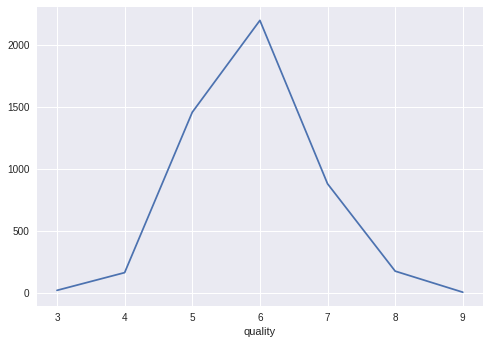

区分を変更した qualitu の種類と個数  {0: 183, 1: 4535, 2: 180}
GradientBoostingClassifier() 0.939795918367347


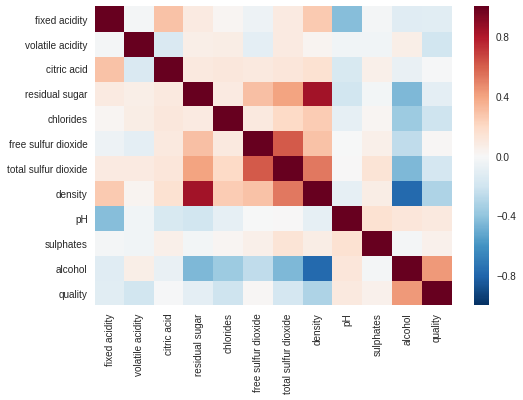

             precision    recall  f1-score   support

          0       0.50      0.12      0.20        32
          1       0.95      0.99      0.97       913
          2       0.86      0.34      0.49        35

avg / total       0.93      0.94      0.93       980

RandomForestClassifier 正解率= 0.9418367346938775


In [30]:
from urllib.request import urlretrieve
import matplotlib.pyplot as plt

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier 
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC
import seaborn as sns


from itertools import groupby
from operator import itemgetter

urlretrieve(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv",
    "winequality-white.csv")

wine= pd.read_csv("winequality-white.csv", sep=";", encoding="utf-8")
# wine

# 品質データごとにグループ分けして、その数を数える
count_data = wine.groupby('quality')["quality"].count()
print(count_data)

# 数えたデータをグラフに描画
count_data.plot()
plt.savefig("wine-count-plt.png")
plt.show()

# データをラベルとデータに分離
y = wine["quality"]
x = wine.drop("quality", axis=1)

# yのラベルをつけ直して、学習結果を改善させる
newlist = []
for v in list(y):
    if v <= 4:
        newlist += [0]
    elif v <= 7:
        newlist += [1]
    else:
        newlist += [2]
print("区分を変更した qualitu の種類と個数 ", {k : len([x for x in g]) for (k, g) in groupby(sorted(newlist))})
y = newlist

# 学習用とテスト用に分割する
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# 学習する
clf = GradientBoostingClassifier()
clf.fit(x_train, y_train)

# 評価する
y_pred = clf.predict(x_test)
print("GradientBoostingClassifier()", accuracy_score(y_test, y_pred))

# 結果を図に表示
corr = wine.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

#--------------------- 別の学習アルゴリズム -------------
# 学習する ---(*3)
model = RandomForestClassifier()
model.fit(x_train, y_train)

# 評価する ---(*4)
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("RandomForestClassifier 正解率=", accuracy_score(y_test, y_pred))

##天気の予想

データ取得： https://www.data.jma.go.jp/gmd/risk/obsdl/

In [0]:
from urllib.request import urlretrieve
import matplotlib.pyplot as plt
import pandas as pd


from itertools import groupby
from operator import itemgetter

urlretrieve(
    "https://raw.githubusercontent.com/katoy/book-mlearn-gyomu/master/ch2/tenki/kion10y.csv",
    "data.csv")
df = pd.read_csv("data.csv", sep=",", encoding="utf-8")
# df

# 日付ごとに気温をリストにまとめる ---(*2)
md = {}
for i, row in df.iterrows():
    m,  d, v = (int(row['月']), int(row['日']), float(row['気温']))
    key = str(m) + "/" + str(d)
    if not(key in md): md[key] = []
    md[key] += [v]

# 日付ごとに平均を求める ---(*3)
avs = {}
for key in md:
    v = avs[key] = sum(md[key]) / len(md[key]) # ---(*4)
    print("{0} : {1}".format(key, v))

In [0]:
from itertools import groupby
import matplotlib.pyplot as plt
import pandas as pd

# CSVを読み込む ---(*1)
urlretrieve(
    "https://raw.githubusercontent.com/katoy/book-mlearn-gyomu/master/ch2/tenki/kion10y.csv",
    "data.csv")
df = pd.read_csv("data.csv", sep=",", encoding="utf-8")

# 月ごとに平均を求める ---(*2)
g = df.groupby(['月'])["気温"]
gg = g.sum() / g.count()

# 結果を出力 ---(*3)
print(gg)
gg.plot()
plt.savefig("tenki-heikin-tuki.png")
plt.show()

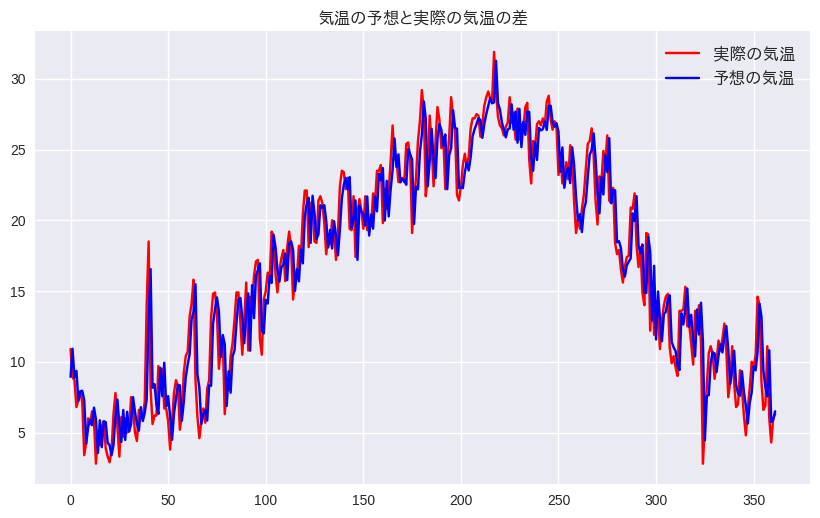

In [35]:
from urllib.request import urlretrieve
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

urlretrieve(
    "https://raw.githubusercontent.com/katoy/book-mlearn-gyomu/master/ch2/tenki/kion10y.csv",
    "data.csv")
df = pd.read_csv("data.csv", sep=",", encoding="utf-8")

interval = 3
train_year = (df["年"] <= 2015)
test_year = (df["年"] >= 2016)

def make_data(data):
    x = []
    y = []
    temps = list(data["気温"])
    for i in range(len(temps)):
        if i <= interval: continue
        y.append(temps[i])
        xa = []
        for p in range(interval):
            d = i + p - interval
            xa.append(temps[d])
        x.append(xa)
    return (x, y)

train_x, train_y = make_data(df[train_year])
test_x, test_y = make_data(df[test_year])

# 機械学習を行う
lr = LinearRegression(normalize=True)
lr.fit(train_x, train_y) # 学習
pre_y = lr.predict(test_x) # 予測

# 結果を図にプロット

# 日本語フォント
fp = FontProperties(fname='/usr/share/fonts/opentype/ipafont-gothic/ipagp.ttf') 

plt.figure(figsize=(10, 6), dpi=100)
plt.plot(test_y, c='r', label="実際の気温")
plt.plot(pre_y, c='b', label="予想の気温")
plt.legend(prop=fp)
plt.title('気温の予想と実際の気温の差', fontproperties=fp)

plt.savefig('tenki-kion-lr.png')
plt.show()

年
2006     2
2007    11
2008     5
2010    21
2011     9
2012     8
2013    16
2014    12
2015     7
2016     1
Name: 年, dtype: int64


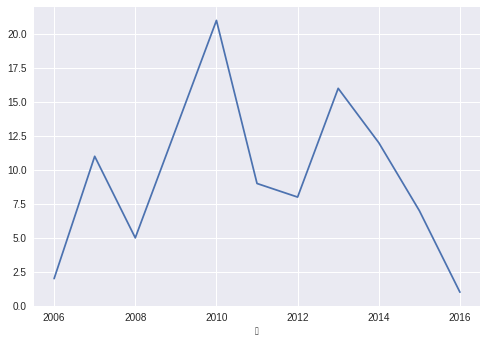

In [36]:
import pandas as pd
from urllib.request import urlretrieve

urlretrieve(
    "https://raw.githubusercontent.com/katoy/book-mlearn-gyomu/master/ch2/tenki/kion10y.csv",
    "data.csv")
df = pd.read_csv("data.csv", sep=",", encoding="utf-8")

#  年ごとの 30 度を超えた日数

atui = (df["気温"] > 30)
cnt = df[atui].groupby(["年"])["年"].count()
print(cnt)
cnt.plot()